<a href="https://colab.research.google.com/github/andandandand/CSV-datasets/blob/master/Copia_de_Jillian_Bailey_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Analytical Report and Research Proposal**

**Introduction**

The 2018 Kaggle ML & DS Survey was an industry-wide survey that looks into machine learning and data science. Kaggle surveyed 23,859 users back in October 2018. The survey consisted of 50 multiple choice questions.

With the machine learning and data science industry growing there is a need for people with the right knowledge and skills to take on such a demanding role. And as a result, a position in this industry is generally considered as a well paid position. But how well paid are people in this industry when considering certain aspects such as gender, location, and educational background?

This report will be looking at the following questions:

*   Is there a gender pay gap in the machine learning/data science industry?
*   Is someone's annual compensation affected by the country they live in?
*   Is there a big difference in annual compensation based on someone's educational background and programming knowledge?

In [0]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import ttest_ind
%matplotlib inline

survey_schema = pd.read_csv('https://raw.githubusercontent.com/jillianbailey92/CSV-datasets/master/SurveySchema.csv')
free_form_responses = pd.read_csv('https://raw.githubusercontent.com/jillianbailey92/CSV-datasets/master/freeFormResponses.csv')
multiple_choice = pd.read_csv('https://www.dropbox.com/s/9pd57prmq7bshc3/multipleChoiceResponses.csv?dl=1')

In [0]:
#@title
cols = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q17','Q20','Q22','Q24','Q25','Q26','Q32','Q37']
multiple_choice = multiple_choice[cols]
multiple_choice.drop(multiple_choice.index[0], inplace=True)
multiple_choice.info()

**Is there a gender pay gap in the machine learning/data science industry?**

In order to first address this question, let's look at the number of respondents to the survey.

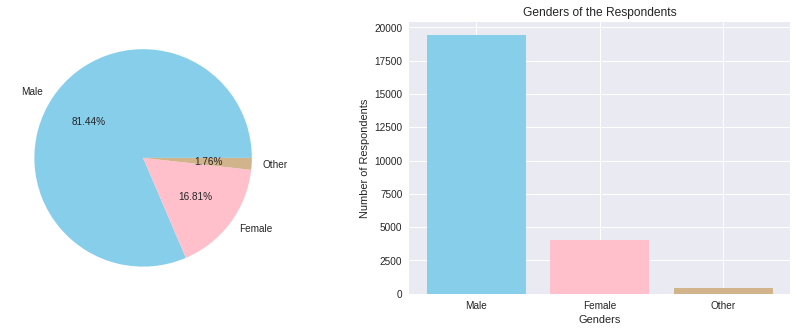

In [0]:
#@title
genders = multiple_choice.Q1.value_counts()
genders['Other'] = genders['Prefer not to say'] + genders['Prefer to self-describe']
genders = genders.drop(['Prefer not to say','Prefer to self-describe'])

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(genders.values, labels = ['Male','Female','Other'], colors = ['skyblue','pink','tan'], autopct='%0.2f%%')

plt.subplot(1,2,2)
plt.bar(genders.index, genders.values, color=['skyblue','pink','tan'])
plt.xlabel('Genders')
plt.ylabel('Number of Respondents')
plt.title('Genders of the Respondents')
plt.show()

As seen above there were many more male responses than female responses which could be in part due to the large population difference in males and females in the machine learning/data science field. Females only made up about 13.81% of the responses while males made up about 85.18% of the responses.

Now let's look at the annual compensation of male and female respondents.

In [0]:
#@title
def average_pay(salary):
    result = re.split('-|,',salary)
    return 1000*(int(result[0]) + int(result[1]))/2

multiple_choice.dropna(inplace=True)
multiple_choice = multiple_choice[~multiple_choice.Q9.isin(['I do not wish to disclose my approximate yearly compensation','500,000+'])]
multiple_choice['salary'] = multiple_choice['Q9'].apply(average_pay)

In [0]:
#@title
all_females = multiple_choice[multiple_choice['Q1'] == 'Female']
all_males = multiple_choice[multiple_choice['Q1'] == 'Male']

all_females.dropna(inplace=True)
all_males.dropna(inplace=True)

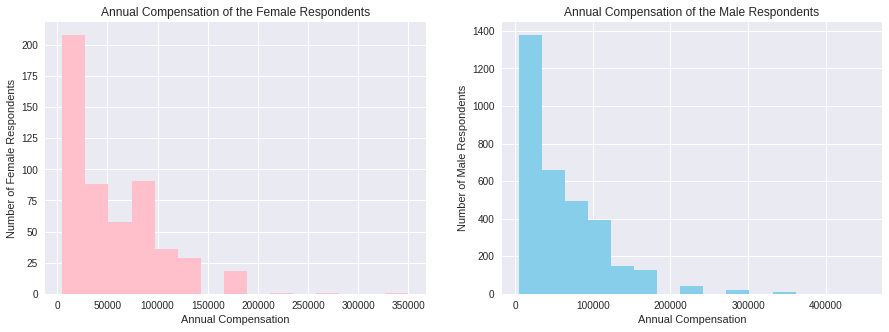

The mean annual compensation of females: $55240.11
The mean annual compensation of males: $56910.69
Annual Compensation based on Gender T-test: Ttest_indResult(statistic=-0.7229663880165127, pvalue=0.46991838843279565)


In [0]:
#@title
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(all_females['salary'], color = 'pink', bins = 15)
plt.xlabel('Annual Compensation')
plt.ylabel('Number of Female Respondents')
plt.title('Annual Compensation of the Female Respondents')

plt.subplot(1,2,2)
plt.hist(all_males['salary'], color = 'skyblue', bins = 15)
plt.xlabel('Annual Compensation')
plt.ylabel('Number of Male Respondents')
plt.title('Annual Compensation of the Male Respondents')
plt.show()

print("The mean annual compensation of females: ${0:.2f}".format(np.mean(all_females['salary'])))
print("The mean annual compensation of males: ${0:.2f}".format(np.mean(all_males['salary'])))
print("Annual Compensation based on Gender T-test:", ttest_ind(all_females['salary'], all_males['salary'], equal_var=False))

The annual compensations of male and female respondents look very similar and there is a slight difference in the average annual compensation between males and females. There is a slight statistical significance with a p-value of 0.469. It should also be noted however there is a large percentage of respondents who are currently receiving a much lower annual compensation, but this could be affected by the respondent's current location.

**Is someone's annual compensation affected by the country they live in?**

Next let's look at the top ten most responded countries.

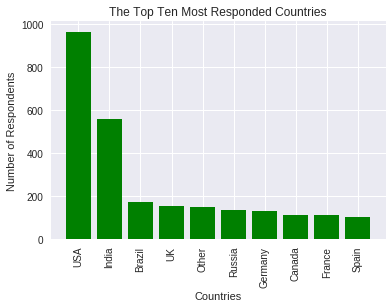

In [0]:
#@title
countries = multiple_choice.Q3.value_counts().head(10)
countries.rename({'United States of America':'USA','United Kingdom of Great Britain and Northern Ireland':'UK'},inplace=True)

plt.bar(countries.index, countries.values, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Countries')
plt.ylabel('Number of Respondents')
plt.title('The Top Ten Most Responded Countries')
plt.show()

The top most responded countries by far were the USA and India. As we will see below the annual compensation in the USA versus India makes a difference in the average annual compensations between male and females.

In [0]:
#@title
usa = multiple_choice[multiple_choice['Q3'] == 'United States of America']
india = multiple_choice[multiple_choice['Q3'] == 'India']

usa.dropna(inplace=True)
india.dropna(inplace=True)

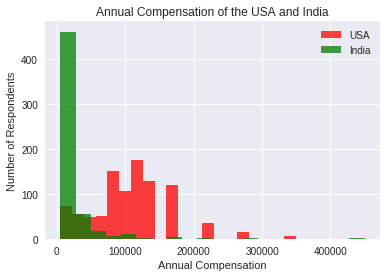

The median annual compensation of the USA: $95000.00
The median annual compensation of India: $5000.00
Annual Compensation based on Location T-test: Ttest_indResult(statistic=36.2922898348714, pvalue=3.934354209483475e-208)


In [0]:
#@title
plt.hist(usa['salary'], color = 'red', alpha = 0.75, bins = 20)
plt.hist(india['salary'], color = 'green', alpha = 0.75, bins = 20)
labels= ["USA","India"]
plt.legend(labels)
plt.xlabel('Annual Compensation')
plt.ylabel('Number of Respondents')
plt.title('Annual Compensation of the USA and India')
plt.show()

print("The median annual compensation of the USA: ${0:.2f}".format(np.median(usa['salary'])))
print("The median annual compensation of India: ${0:.2f}".format(np.median(india['salary'])))
print("Annual Compensation based on Location T-test:", ttest_ind(usa['salary'], india['salary'], equal_var=False))

The graph above shows the annual compensation of India is skewed to the lower end. The USA annual compensation is slightly more spread out in the 5,000 dollars to 150,000 dollars range. There is also a 90,000 dollars difference between the median annual compensations for the USA and India. This is statistically significant with p-value of 0.393e-207. Which proves that there is a significant difference in the annual compensation of the USA and India.

**Is there a big difference in annual compensation based on someone's educational background and programming knowledge?**

Now let's look at how annual compensation can be affected by educational background.

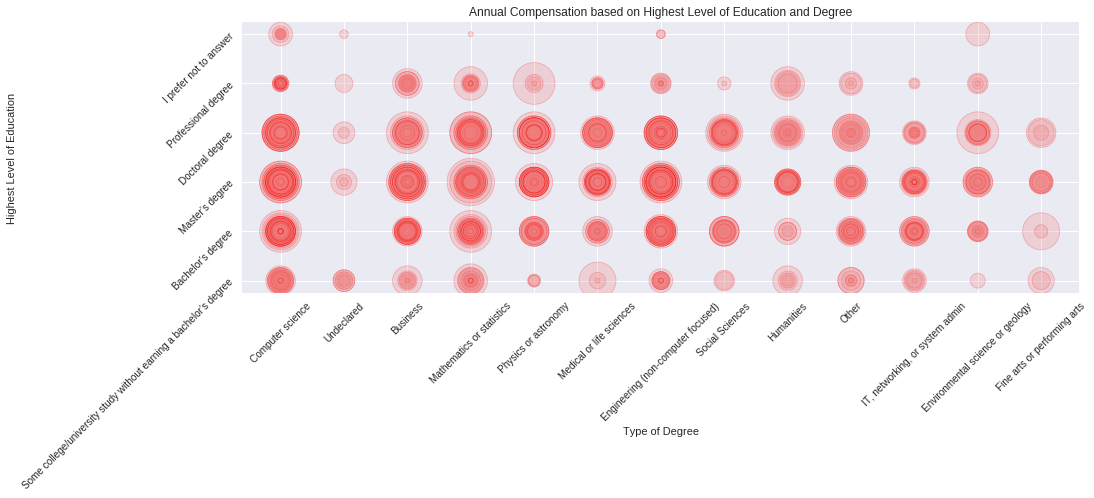

In [0]:
#@title
education = pd.DataFrame(columns = ['level','degree','salary'])
education['level'] = multiple_choice['Q4']
education['degree'] = multiple_choice['Q5']
education['salary'] = multiple_choice['salary']

education = education.replace(to_replace = ['Computer science (software engineering, etc.)','Social sciences (anthropology, psychology, sociology, etc.)',
                                            'I never declared a major','A business discipline (accounting, economics, finance, etc.)',
                                           'Humanities (history, literature, philosophy, etc.)','Medical or life sciences (biology, chemistry, medicine, etc.)',
                                           'Information technology, networking, or system administration'], 
                              value = ['Computer science','Social Sciences','Undeclared','Business','Humanities','Medical or life sciences','IT, networking, or system admin'])

plt.figure(figsize=(15,5))
plt.scatter(education['degree'], education['level'], s=education['salary']/200, color='lightcoral', alpha=0.25, edgecolor='red', linewidth=0.75)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel('Highest Level of Education')
plt.xlabel('Type of Degree')
plt.title('Annual Compensation based on Highest Level of Education and Degree')
plt.show()

This is the most interesting of the visualizations. It is plain to see that those who are receiving higher annual compensations have higher levels of education in associated fields like computer science, business, mathematics or statistics. Yet, there are also some interesting outliers such the respondent who worked on a degree in medical or life sciences but did not complete it. Or the respondent who received a bachelor's degree in fine arts or performing arts. These outliers may be supportive proof that annual compensation does not directly correlate with a person's educational background in terms of highest level of degree and type.

Let's also take a look at annual compensation in comparison to programming language knowledge.

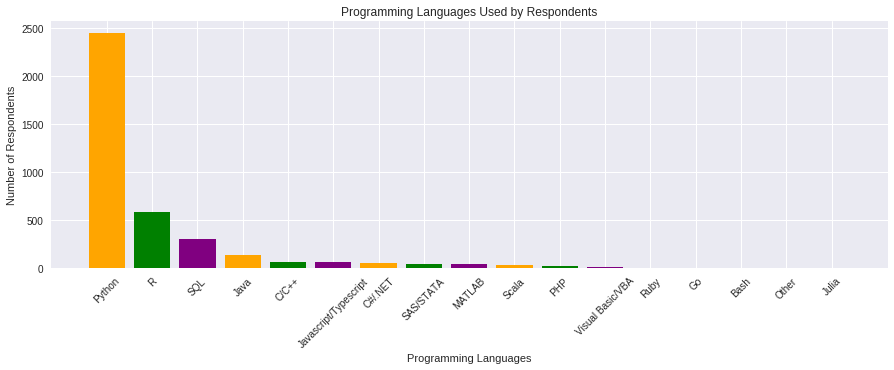

In [0]:
#@title
language = pd.DataFrame(columns=['language','salary'])
language['language'] = multiple_choice['Q17']
language['salary'] = multiple_choice['salary']
types = language.language.value_counts()

plt.figure(figsize=(15, 10))

plt.subplot(2,1,1)
plt.bar(types.index, types.values, color=['orange','green','purple'])
plt.xticks(rotation=45)
plt.xlabel('Programming Languages')
plt.ylabel('Number of Respondents')
plt.title('Programming Languages Used by Respondents')
plt.show()

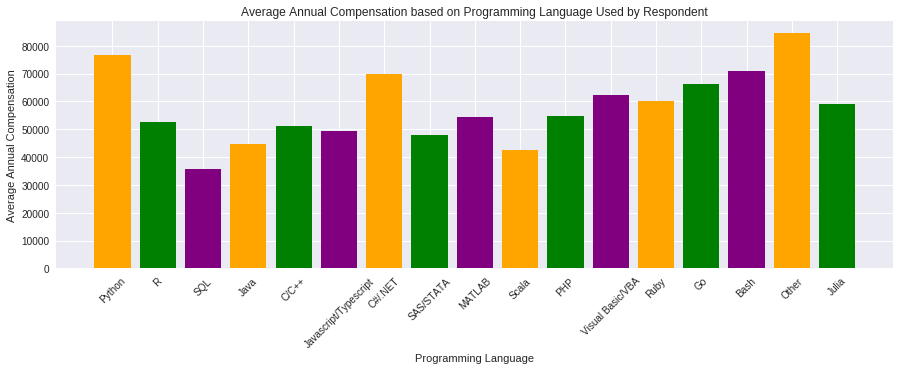

In [0]:
#@title
plt.figure(figsize=(15, 10))

plt.subplot(2,1,1)
plt.bar(types.index,language.groupby('language')['salary'].mean(), color=['orange','green','purple'])
plt.xticks(rotation=45)
plt.xlabel('Programming Language')
plt.ylabel('Average Annual Compensation')
plt.title('Average Annual Compensation based on Programming Language Used by Respondent')
plt.show()

As seen above in the first graph, Python is by far the most used of the programming languages. But as seen in the second graph, it has only one of the highest average annual compensations.

Let's look into the annual compensations of Python users vs users of other programming languages.

In [0]:
#@title
python = multiple_choice[multiple_choice['Q17'] == 'Python']
other_languages = multiple_choice[multiple_choice['Q17'] != 'Python']

python.dropna(inplace=True)
other_languages.dropna(inplace=True)

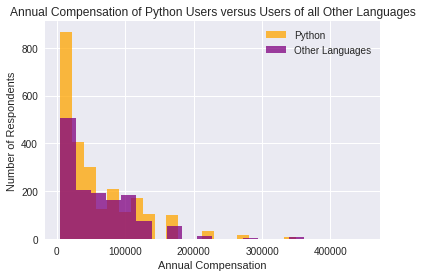

The mean annual compensation of the Python Users: $54732.11
The mean annual compensation of Other Programming Languages Users: $60594.64
Annual Compensation based on Programming Language T-test: Ttest_indResult(statistic=-3.2061727827592796, pvalue=0.0013595132670147715)


In [0]:
#@title
plt.hist(python['salary'], color = 'orange', alpha = 0.75, bins = 20)
plt.hist(other_languages['salary'], color = 'purple', alpha = 0.75, bins = 20)
labels= ["Python","Other Languages"]
plt.legend(labels)
plt.xlabel('Annual Compensation')
plt.ylabel('Number of Respondents')
plt.title('Annual Compensation of Python Users versus Users of all Other Languages')
plt.show()

print("The mean annual compensation of the Python Users: ${0:.2f}".format(np.mean(python['salary'])))
print("The mean annual compensation of Other Programming Languages Users: ${0:.2f}".format(np.mean(other_languages['salary'])))
print("Annual Compensation based on Programming Language T-test:", ttest_ind(python['salary'], other_languages['salary'], equal_var=False))

Interestingly enough, in general Python users do not have higher annual compensations compared to all other programming languages. Yet similarly to other comparisons above, this could be skewed towards the lower amounts due to the high percentage of survey respondents from lower paying countries where Python is most commonly used. This is statistically significant with a p-value of 0.00135.

**Conclusion**

In conclusion, males in general do get paid more than females, but that is also affected by location. The annual compensation of a male or female data scientist living in the USA will most likely be greater than the average annual compensation of both male and female data scientists living in countries such as India. The level and type of degree probably has some effect on possible annual compensation, but there could be more factors involved such as programming knowledge gained through self-study or good networking skills.

**Further Research**

The most interesting aspects of this dataset were the correlation between educational background and programming knowledge to a person's annual compensation. For further research into the annual compensation of people in the machine learning and data science industry, I would propose looking into other effects such as networking. In most cases, it is helpful to get into any industry if a person knows someone currently working in the industry. Does that person's annual compensation correlate with the annual compensation of their networking contact? There were also some respondents in the survey that had educational background in degrees that one would not associate with machine learning and data science. Yet their background could provide helpful knowledge into the specific data their company is analyzing. What categories of data are each of the respondents working with on a daily basis?